## Alberta Load Analysis





[Current Supply Demand Report](http://http://ets.aeso.ca/ets_web/ip/Market/Reports/CSDReportServlet)


All values listed are in MW


 Current Supply Demand (CSD) Report Help
 
Legend

*	Indicates that the value reported in MC column actually represents the asset's MCR

**Alberta Internal Load**	Calculated total Alberta demand based on all telemetered Control Area Net Generation plus Net Actual Interchange.

**Alberta Total Net Generation**	Total telemetered Net Generation within the Alberta control Area

**Contingency Reserve Required**	Based on the WSCC Reserve calculation Methodology - DCR Required is the amount of Contingency reserve that should be obtained on average during the hour

**DCR**	Dispatched (and Accepted) Contingency Reserve

**DCR Generation**	Total Dispatched Contingency Reserve obtained from Generation assets

**DCR Other**	Total Dispatched Contingency Reserve obtained from Non- Generation assets (Interconnections, Load, etc)

**DCR Total**	The mathematical sum of DCR Generation plus DCR Other

**Net Actual Interchange**	Control area interchange between Alberta and British Columbia, Saskatchewan and Montana - Defined as Import (-) or Export (+)


**Net-To-Grid Generation**	Net-To-Grid Generation is calculated as per the definition "net generation the ISO determines is delivered to the grid" in Alberta Reliability Standard BAL-002-WECC-AB-2). 

Load used to calculate contingency reserves requirements, as per BAL-002-WECC-AB-2, is Net-To-Grid Generation minus Net Actual Interchange. Please see BAL-002-WECC-AB-2 for more information


**MC**	Maximum Capability. For a generating asset, the maximum quantity (MW) that the generating asset is physically capable of providing under optimal operating conditions for that asset while complying with all applicable ISO rules and terms and conditions of the ISO tariff. 

Note that the MCs of coal assets are net of auxiliary load.
**MCR**	Maximum Continuous Rating

**TNG**	Total Net Generation (Gross Generation minus Asset service)

In [3]:
# load packages -----------------------------------------------------
#install.packages("zoo", repos = "https://cran.rstudio.com")
#install.packages("forecast", repos = "https://cran.rstudio.com")
#install.packages("cowplot", repos = "https://cran.rstudio.com")
#install.packages("ggfortify", repos = "https://cran.rstudio.com")
library(dplyr)
library(readxl)
library(tidyr)
library(lubridate)
library(zoo)
library(forecast)
library(cowplot)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'forecast' was built under R version 3.4.3"Warning message:
"package 'cowplot' was built under R version 3.4.3"Loading required package: ggplot2

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave



In [4]:
# load data ---------------------------------------------------------
data = read_excel("G:\\Dropbox (UVic Economics)\\energy\\solar\\model\\data\\load\\Hourly-load-data-for-2005-2016.xlsx",
                  sheet = "Hourly Load Data 2016")
str(head(data))

Classes 'tbl_df', 'tbl' and 'data.frame':	6 obs. of  10 variables:
 $ Settlement Interval (GMT)  : POSIXct, format: "2005-01-01 07:00:00" "2005-01-01 08:00:00" ...
 $ Settlement Interval (Local): POSIXct, format: "2005-01-01 00:00:00" "2005-01-01 01:00:00" ...
 $ Date (Local)               : POSIXct, format: "2005-01-01" "2005-01-01" ...
 $ Alberta Internal Load      : num  7636 7513 7378 7292 7220 ...
 $ Implied System Load        : num  6330 6290 6132 6068 5978 ...
 $ Metered Load               : num  6000 5922 5782 5711 5628 ...
 $ year                       : num  2005 2005 2005 2005 2005 ...
 $ month                      : num  1 1 1 1 1 1
 $ day                        : num  1 1 1 1 1 1
 $ hour                       : num  0 1 2 3 4 5


In [5]:
data %>% 
select( `Settlement Interval (Local)`,`Alberta Internal Load`) %>% 
zoo( order.by = index(data$`Settlement Interval (Local)`) )

       Settlement Interval (Local) Alberta Internal Load
1      2005-01-01 00:00:00          7636                
2      2005-01-01 01:00:00          7513                
3      2005-01-01 02:00:00          7378                
4      2005-01-01 03:00:00          7292                
5      2005-01-01 04:00:00          7220                
6      2005-01-01 05:00:00          7209                
7      2005-01-01 06:00:00          7301                
8      2005-01-01 07:00:00          7349                
9      2005-01-01 08:00:00          7433                
10     2005-01-01 09:00:00          7480                
11     2005-01-01 10:00:00          7528                
12     2005-01-01 11:00:00          7772                
13     2005-01-01 12:00:00          7844                
14     2005-01-01 13:00:00          7837                
15     2005-01-01 14:00:00          7834                
16     2005-01-01 15:00:00          7887                
17     2005-01-01 16:00:00     

In [6]:
# Internal load ------------------------------------------

#internalLoad <- 
#library(ggfortify)  
  
# increasing using rollmean to demostrate
data_zoo=data %>% 
select( `Settlement Interval (Local)`,`Alberta Internal Load`) %>% 
zoo( order.by = index(data$`Settlement Interval (Local)`) ) 




In [30]:
data %>% mutate(year = year(`Settlement Interval (Local)`)) %>% 
group_by(year) %>% summarise(year_load=sum(`Alberta Internal Load`,na.rm=T))

year,year_load
2005,66266742
2006,69371475
2007,69660876
2008,69946515
2009,69914294
2010,71722819
2011,73600056
2012,75574375
2013,77450544
2014,79949456


In [32]:
(79560087-66266742)/66266742


[1] 0.2006036

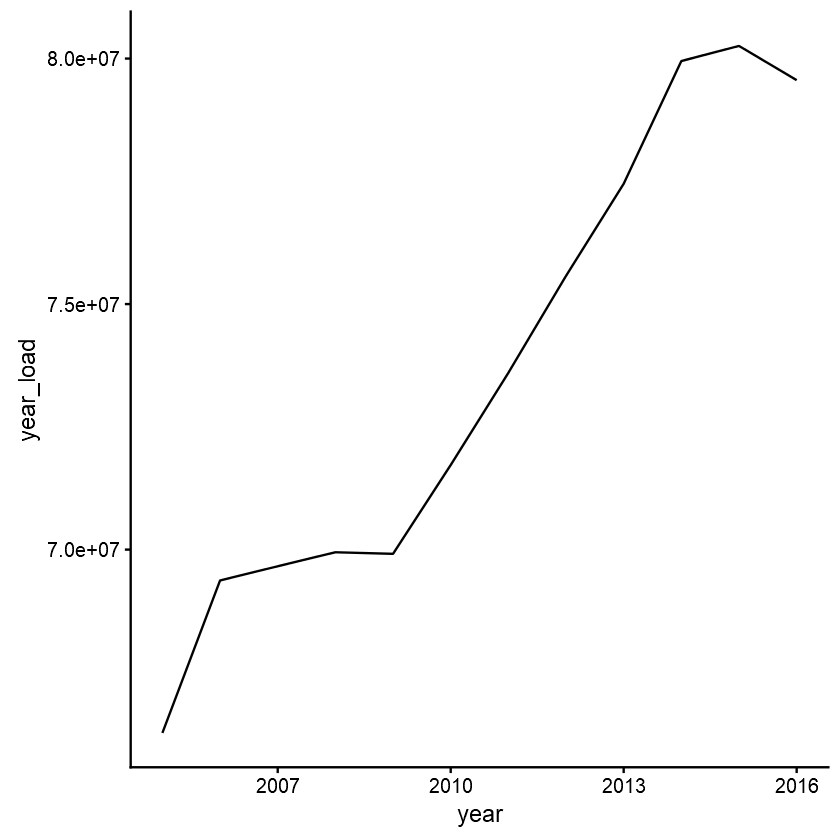

In [31]:
data %>% mutate(year = year(`Settlement Interval (Local)`)) %>% 
group_by(year) %>% summarise(year_load=sum(`Alberta Internal Load`,na.rm=T))%>% 
ggplot(mapping = aes(x= year, y = year_load)) +
geom_line() 

In [28]:
# peak hourly load during for each hour
data %>% mutate(hour = hour(`Settlement Interval (Local)`)) %>% 
group_by(hour) %>% summarise(peak_load=max(`Alberta Internal Load`,na.rm=T))

hour,peak_load
0,10231
1,10074
2,9976
3,9890
4,9934
5,10130
6,10526
7,10995
8,11187
9,11119


Typically, the demand for electricity is higher in the morning as Albertans prepare to start their day and declines slightly to a steady level throughout the day. A second increase occurs in the early evening hours as Albertans return home from work or school and place more demand for electricity on the system using home appliances and street lighting. Demand then decreases throughout the night. It shifts with the seasons as well; cold weather increases the demand for electricity required to run heaters, furnaces and lighting, and hot weather increases the demand from air conditioning and refrigeration.
System

-- How is the pool price for electricity determined?

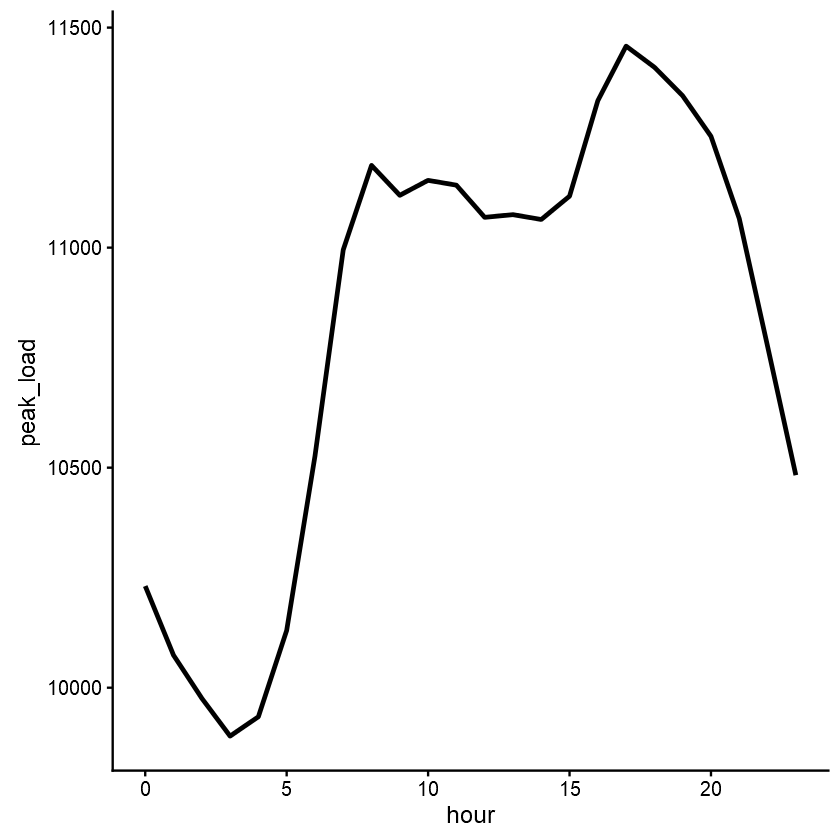

In [23]:
# peak hourly load during for each hour
data %>% mutate(hour = hour(`Settlement Interval (Local)`)) %>% 
group_by(hour) %>% summarise(peak_load=max(`Alberta Internal Load`,na.rm=T))%>% 
ggplot(mapping = aes(x= hour, y = peak_load)) +
geom_line(size =1) 

In [25]:
# peak hourly load for each month during 2005 to 2016
data %>% mutate(month = month(`Settlement Interval (Local)`)) %>% 
group_by(month) %>% summarise(peak_load=max(`Alberta Internal Load`,na.rm=T))

month,peak_load
1,11229
2,10956
3,10743
4,9783
5,9512
6,10319
7,10520
8,10515
9,9909
10,10074


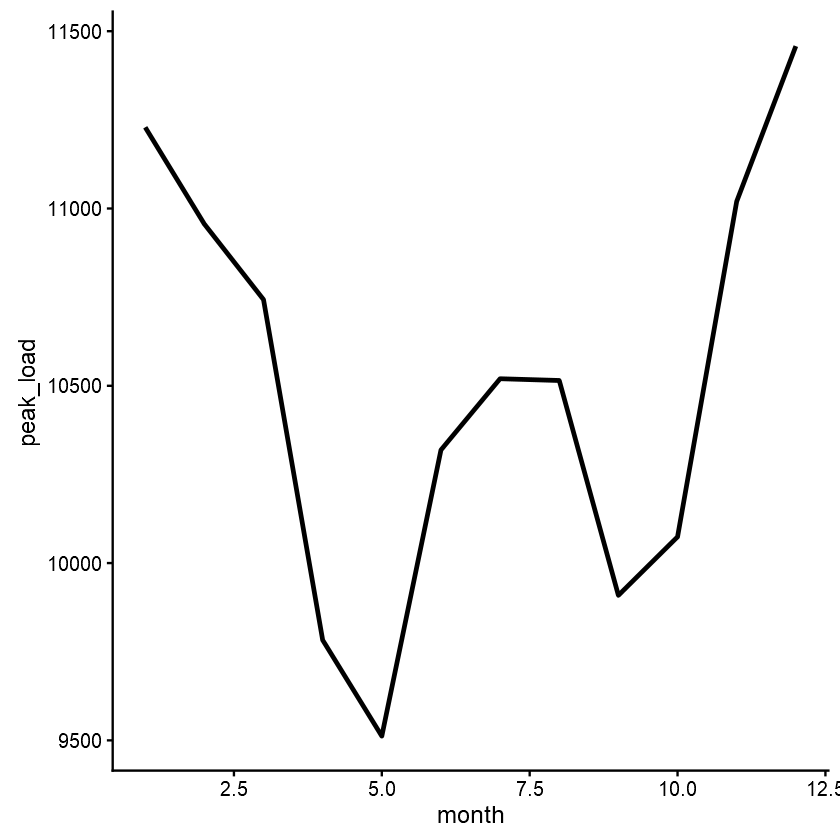

In [22]:
# peak hourly load for each month during 2005 to 2016
data %>% mutate(month = month(`Settlement Interval (Local)`)) %>% 
group_by(month) %>% summarise(peak_load=max(`Alberta Internal Load`,na.rm=T))%>% 
ggplot(mapping = aes(x= month, y = peak_load)) +
geom_line(size =1) 

In [7]:
# average daily load for each hour
data %>% mutate(hour = hour(`Settlement Interval (Local)`)) %>% 
group_by(hour) %>% summarise(ave_load=mean(`Alberta Internal Load`,na.rm=T))

hour,ave_load
0,7818.283
1,7672.432
2,7590.783
3,7561.206
4,7582.181
5,7691.711
6,7968.899
7,8324.529
8,8526.699
9,8655.319


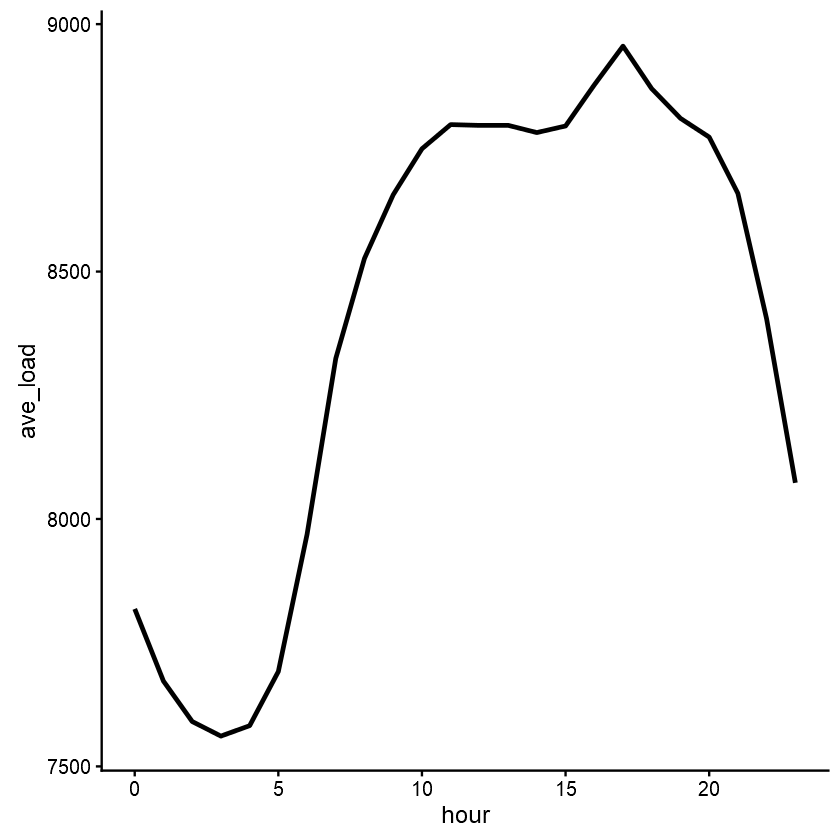

In [21]:
# average daily load for each hour
data %>% mutate(hour = hour(`Settlement Interval (Local)`)) %>% 
group_by(hour) %>% summarise(ave_load=mean(`Alberta Internal Load`,na.rm=T))%>% 
ggplot(mapping = aes(x= hour, y = ave_load)) +
geom_line(size =1) 

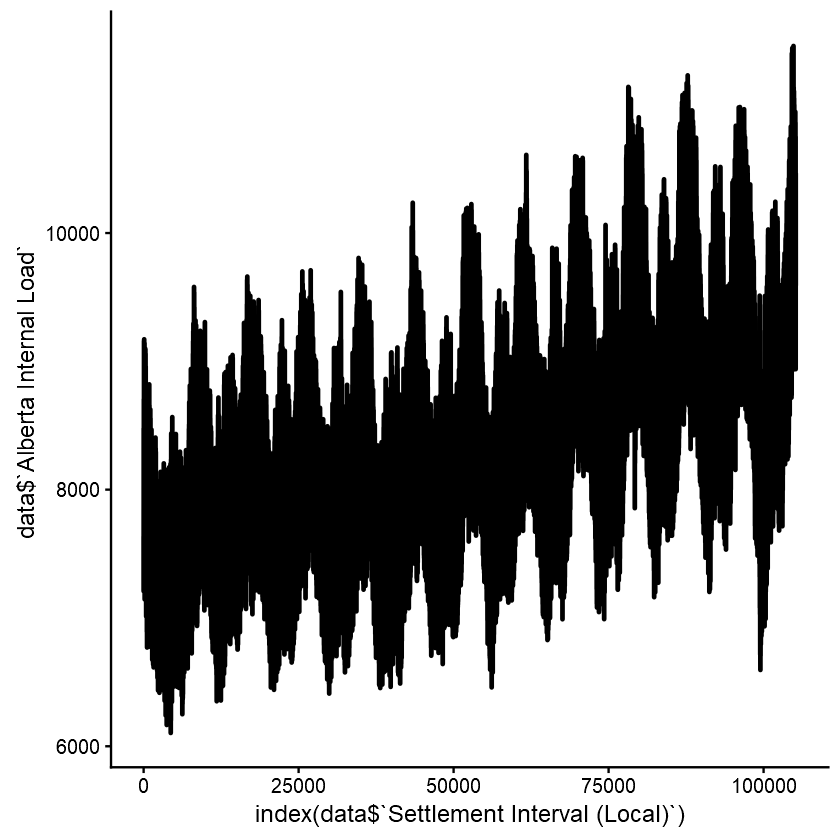

In [20]:
ggplot(mapping = aes(x=index(data$`Settlement Interval (Local)`) ,y = data$`Alberta Internal Load`)) +
geom_line(size =1) 

